In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import sys
sys.path.insert(0, '../../../')
import antenna_toolbox as ant

In [7]:
# Define the file name of your arg chamber data
example_arg_e_field_data = 'example_arg_e_field_data.txt'

# Load that data into a pattern object
p = ant.parse.read_arg_chamber_pattern_data(example_arg_e_field_data, linear_or_circular=False)

# Compute the linear fields from the circular fields
p.compute_Ephi_from_ERHCP_ELHCP()
p.compute_Etheta_from_ERHCP_ELHCP()

# Calculate the power fields of the data
p.compute_URHCP_from_ERHCP() 
p.compute_ULHCP_from_ELHCP() 

# Calculate the directivity of the data
p.compute_directivity_RHCP()

# If you know the radiation efficiency and mismatch efficiency you can then calculate realized gain directly
mismatch_efficiency = 0.1
radiation_efficiency = 0.45
p.compute_realized_gain_RHCP(mismatch_efficiency, radiation_efficiency)

# Find the peak directivity of the object
p.find_peak('Directivity_RHCP')

# Display the object
p, p.attrs.Max_Directivity_RHCP

(<xarray.Dataset>
 Dimensions:    (field: 8, frequency: 11, phi: 37, theta: 361)
 Coordinates:
   * field      (field) object 'ELHCP' 'ERHCP' ... 'Realized_Gain_RHCP'
   * frequency  (frequency) float64 0.41 0.4105 0.411 ... 0.414 0.4145 0.415
   * phi        (phi) float64 1.99e-13 5.0 10.0 15.0 ... 165.0 170.0 175.0 180.0
   * theta      (theta) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
 Data variables:
     value      (field, frequency, phi, theta) complex128 (0.01939494912724600...,
 array([9.06901087, 9.03367019, 9.06685535, 9.1234412 , 9.17481649,
        9.21204696, 9.22096521, 9.26904184, 9.27828901, 9.31309821,
        9.34845715]))

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


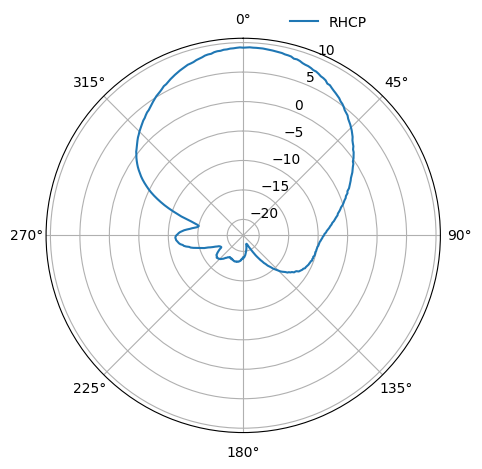

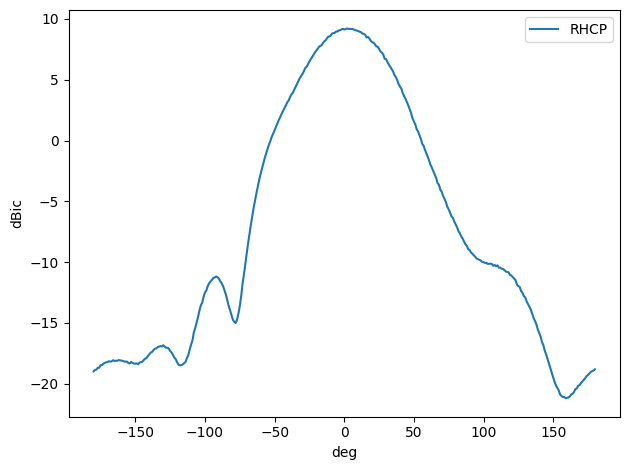

In [8]:
# Plot the directivity
field_names = [
    'Directivity_RHCP'
    ]
field_labels = ['RHCP', 'LHCP']
frequency = 0.413
phi = 180

plt.figure()
ant.plot.polar_phi_cut(p, field_names, frequency, phi, field_labels)
plt.figure()
ant.plot.rect_phi_cut(p, field_names, frequency, phi, field_labels)

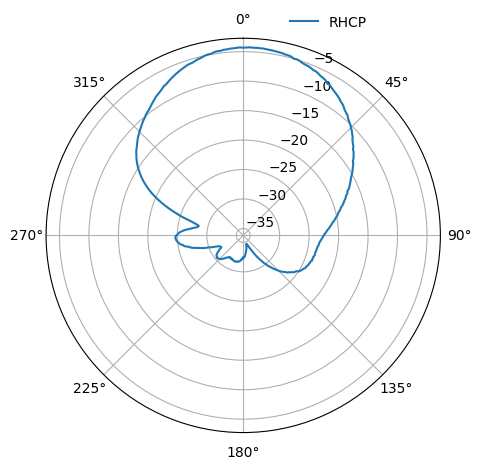

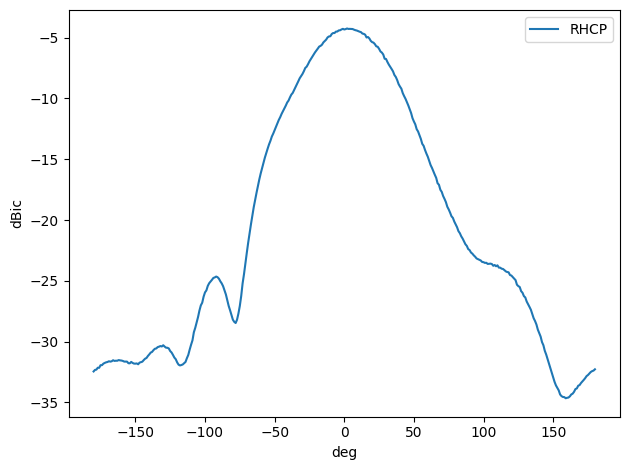

In [9]:
# Plot the realized gain
field_names = [
    'Realized_Gain_RHCP'
    ]
field_labels = ['RHCP', 'LHCP']
frequency = 0.413
phi = 180

plt.figure()
ant.plot.polar_phi_cut(p, field_names, frequency, phi, field_labels)
plt.figure()
ant.plot.rect_phi_cut(p, field_names, frequency, phi, field_labels)